<a href="https://colab.research.google.com/github/Hing-9/CPS/blob/main/CPS_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경설정

## Library Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px

from tqdm import tqdm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

## Google Cloud Connect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/CPS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CPS


## Data Load

In [ ]:
df_oper = pd.read_excel('./Project_Dataset.xlsx', sheet_name='OperationData')
df_oper

,RunOrder,Type,PNo,WPNo,StepNo,ONo,OPos,Description,OpNo,NextStepNo,...,PlanedStart,PlanedEnd,Start,End,Real_Time difference,ResourceID,Temperature,Temperature_Time,Drilling_Count,Fuse
0,1,Training,20017,20017,10,2578,1,release a defined part on stopper 1,212,20,...,2022-08-04 13:55:08,2022-08-04 13:55:23,2022-08-04 13:56:16,2022-08-04 13:56:33,17,1,55.6,71.2,0,0
1,1,Training,20017,20017,20,2578,1,measure a part (analog),115,30,...,2022-08-04 13:55:23,2022-08-04 13:55:25,2022-08-04 13:57:08,2022-08-04 13:57:10,2,2,55.6,71.2,0,0
2,1,Training,20017,20017,30,2578,1,assemble a PCB with no fuse,301,40,...,2022-08-04 13:55:25,2022-08-04 13:56:05,2022-08-04 13:57:49,2022-08-04 13:59:05,76,4,55.6,71.2,0,0
3,1,Training,20017,20017,40,2578,1,camera check false if any fuse is detected,401,50,...,2022-08-04 13:56:05,2022-08-04 13:56:07,2022-08-04 13:59:20,2022-08-04 13:59:20,0,5,55.6,71.2,0,0
4,1,Training,20017,20017,50,2578,1,feed part from magazin,200,60,...,2022-08-04 13:56:07,2022-08-04 13:56:11,2022-08-04 13:59:45,2022-08-04 13:59:47,2,6,55.6,71.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,21,Test,20037,20037,50,2580,7,true if the both fuses are detected,404,60,...,2022-08-04 15:42:42,2022-08-04 15:42:44,2022-08-04 19:08:46,2022-08-04 19:08:47,1,5,37.5,35.0,2,2
178,21,Test,20037,20037,60,2580,7,feed part from magazin,200,70,...,2022-08-04 15:42:44,2022-08-04 15:42:48,2022-08-04 19:09:11,2022-08-04 19:09:13,2,6,37.5,35.0,2,2
179,21,Test,20037,20037,70,2580,7,pressing with force regulation,111,80,...,2022-08-04 15:42:48,2022-08-04 15:43:32,2022-08-04 19:09:25,2022-08-04 19:10:14,49,7,37.5,35.0,2,2
180,21,Test,20037,20037,80,2580,7,heating Part,112,90,...,2022-08-04 15:43:32,2022-08-04 15:44:27,2022-08-04 19:10:26,2022-08-04 19:11:28,62,8,37.5,35.0,2,2


In [ ]:
df_power = pd.read_excel('./Project_Dataset.xlsx', sheet_name='PowerData')
df_power

,timeStamp,resourceID,activePower,reactivePower,apparentPower,RunOrder
0,2022-08-04 13:56:16,8,-73176,36469,-89123,1.0
1,2022-08-04 13:56:16,7,-65055,60748,-93355,1.0
2,2022-08-04 13:56:16,6,-97252,60998,-121228,1.0
3,2022-08-04 13:56:16,5,-67893,53940,-94672,1.0
4,2022-08-04 13:56:16,4,-189185,164702,-270358,1.0
...,...,...,...,...,...,...
151571,2022-08-04 19:12:02,5,-67730,54210,-94840,21.0
151572,2022-08-04 19:12:02,4,-190398,165740,-271702,21.0
151573,2022-08-04 19:12:02,2,-89908,59707,-115390,21.0
151574,2022-08-04 19:12:02,3,-68201,56946,-95089,21.0


# 설명적 분석(Descriptive Analytics)

## RunOrder별 생산시간 분석

### 작업별 소요시간을 단순히 더했을 때

<ipython-input-5-2377805685d7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oper.groupby('RunOrder').sum()['Real_Time difference'].plot(kind='bar', rot=0)


<Axes: xlabel='RunOrder'>

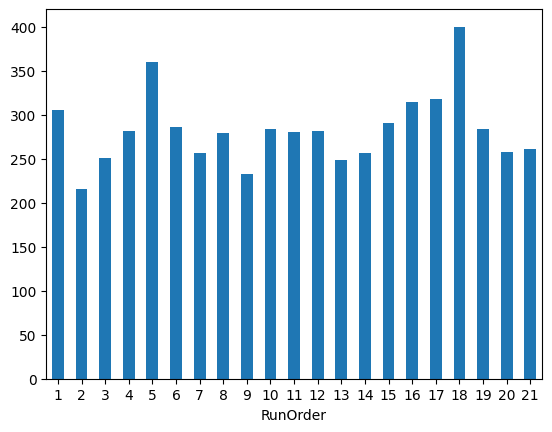

In [ ]:
df_oper.groupby('RunOrder').sum()['Real_Time difference'].plot(kind='bar', rot=0)

### RunOrder당 종료시각에서 시작시각을 뺐을 때

<Axes: xlabel='RunOrder'>

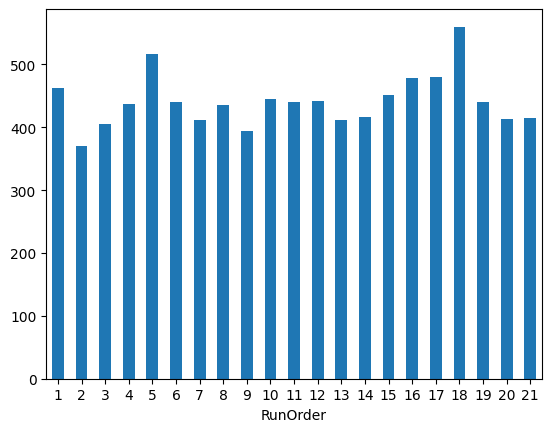

In [ ]:
(df_oper[df_oper['NextStepNo']==0][['RunOrder','End']].set_index('RunOrder')['End'] - df_oper[df_oper['FirstStep']==True][['RunOrder','Start']].set_index('RunOrder')['Start']).dt.seconds.plot(kind='bar', rot=0)

큰 차이는 없어보임..

## StepNo별 작업시간 분석

### 누적막대그래프로 표현하기(전처리 전)

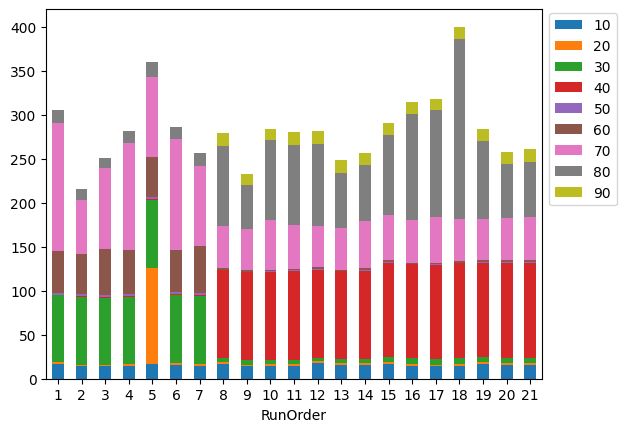

In [ ]:
df_oper.pivot(index='RunOrder', columns='StepNo', values='Real_Time difference').plot.bar(stacked=True, rot=0).legend(loc='lower left', bbox_to_anchor=(1.0, 0.45))

RunOrder가 8 미만인 경우와 8 이상인 경우가 다름. 하나씩 밀리는 것으로 확인

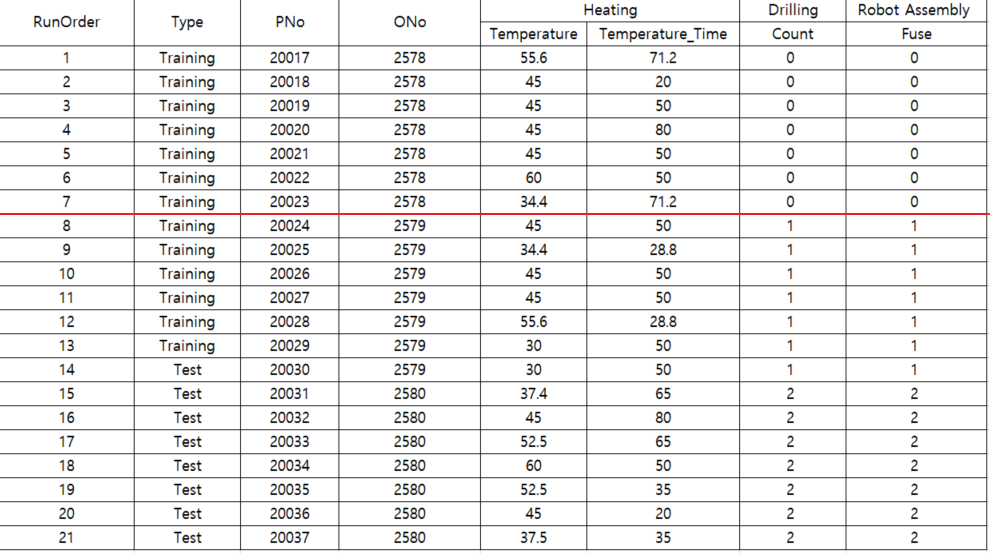

- 보시다시피 RunOrder 8번부터 퓨즈가 추가되어 Drilling이 추가되었기 때문.
- 때문에 "작업별" 소요시간을 파악하려면 StepNo별로 평균을 나타내어서는 안됨!

### 누적막대그래프로 표현하기(전처리 후)

In [ ]:
df_oper['ResourceID_For_StepNo'] = df_oper['ResourceID']
con = (df_oper['FirstStep']==False) & (df_oper['ResourceID']==1)
df_oper.loc[con, 'ResourceID_For_StepNo'] = 9

Release와 구분하기 위해 Store Step을 9로 지정한 ResourceID_For_StepNo Column을 새로 지정

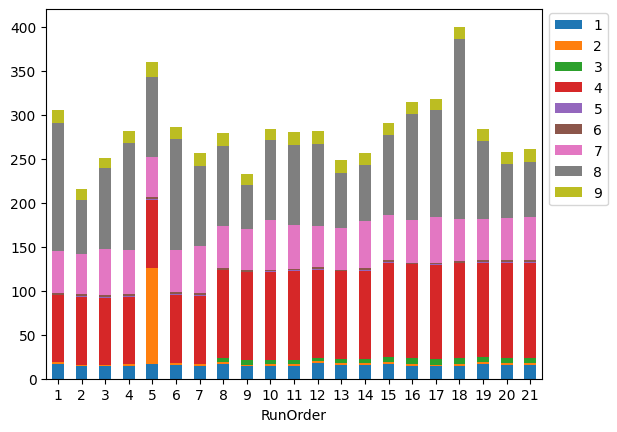

In [ ]:
df_oper.pivot(index='RunOrder', columns='ResourceID_For_StepNo', values='Real_Time difference').plot.bar(stacked=True, rot=0).legend(loc='lower left', bbox_to_anchor=(1.0, 0.45))

### StepNo별 작업시간 평균 계산

<ipython-input-10-7a7711bf4bf7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oper.groupby('ResourceID_For_StepNo').mean()['Real_Time difference'].plot(kind='bar', rot=0)


<Axes: xlabel='ResourceID_For_StepNo'>

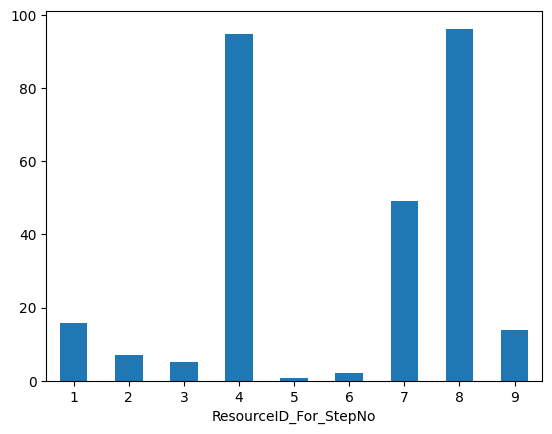

In [ ]:
df_oper.groupby('ResourceID_For_StepNo').mean()['Real_Time difference'].plot(kind='bar', rot=0)

## 제품유형(Fuse 개수)이 생산시간에 미치는 영향도 분석

### 총 소요시간 분석

<ipython-input-11-a6f4754e4bb5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oper.groupby('Fuse').sum()[['Real_Time difference']].plot(kind='bar', rot=0)


<Axes: xlabel='Fuse'>

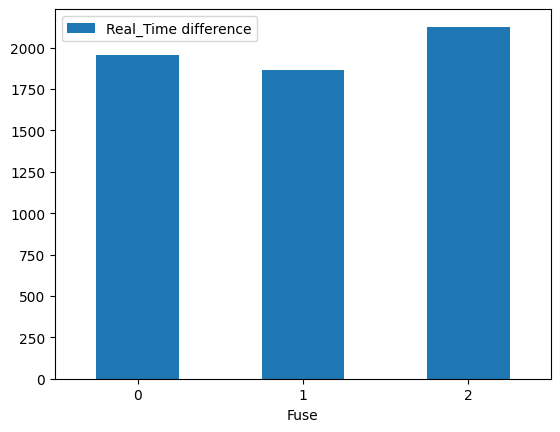

In [ ]:
df_oper.groupby('Fuse').sum()[['Real_Time difference']].plot(kind='bar', rot=0)

### StepNo별 소요시간 비교

<ipython-input-12-1ed2186d2458>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oper_tmp = df_oper.groupby(['Fuse', 'ResourceID_For_StepNo']).mean()[['Real_Time difference']]


<Axes: xlabel='ResourceID_For_StepNo'>

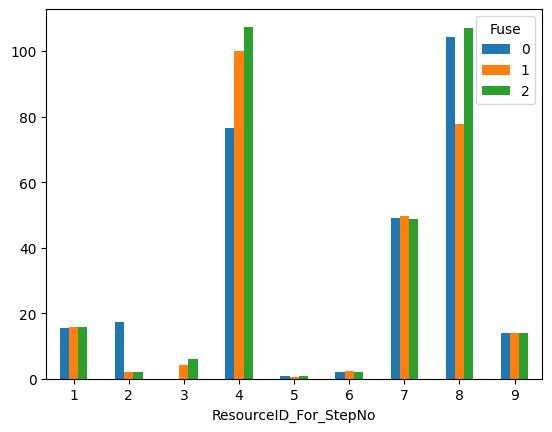

In [ ]:
df_oper_tmp = df_oper.groupby(['Fuse', 'ResourceID_For_StepNo']).mean()[['Real_Time difference']]
df_oper_tmp.reset_index().pivot(index='Fuse', columns='ResourceID_For_StepNo', values='Real_Time difference').fillna(0).T.plot(kind='bar', rot=0)

## 1개 RunOrder에 대한 ResourceID별 간트차트 생성

In [ ]:
df_oper[df_oper['RunOrder']==18]
fig = px.timeline(df_oper[df_oper['RunOrder']==18], x_start='Start', x_end='End', y='ResourceID')
fig.update_yaxes(autorange="reversed")
fig.show()

## ResourceID별 설비종합효율 분석

### 시간가동률
 - 가동시간 / 부하시간
  - 가동시간 = 부하시간 - 정지시간
  - 부하시간 = 조업시간 - 비근무시간

In [ ]:
df_oper[df_oper['ErrorStepNo']!=0]

,RunOrder,Type,PNo,WPNo,StepNo,ONo,OPos,Description,OpNo,NextStepNo,...,PlanedEnd,Start,End,Real_Time difference,ResourceID,Temperature,Temperature_Time,Drilling_Count,Fuse,ResourceID_For_StepNo


- 부하시간 = Real_Time difference의 합
- 설비고장 및 기종변경 등의 사유로 정지된 적은 없기 때문에 "가동시간 = 부하시간"

In [ ]:
df_oper_oee = df_oper.groupby('ResourceID').sum()[['Real_Time difference']]
df_oper_oee.columns = ['부하시간']

df_oper_oee['가동시간'] = df_oper_oee['부하시간']
df_oper_oee['시간 가동률'] = df_oper_oee['가동시간'] / df_oper_oee['부하시간']

<ipython-input-15-2ad2b51dcb15>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### 성능 가동률
 - 성능 가동시간 / 가동시간
  - 성능 가동시간 = 완성수 * 표준 C/T

- 표준 C/T는 Planed_Time difference로, 각 RunOrder별 다르기 때문에 Row별로 계산 후 Sum

In [ ]:
df_oper['Planed_Time difference'] = (df_oper['PlanedEnd']-df_oper['PlanedStart']).dt.seconds

df_oper['성능 가동률'] = df_oper['Planed_Time difference'] / df_oper['Real_Time difference']

df_oper = df_oper.replace([np.inf, -np.inf], np.nan)
df_oper_oee['성능 가동률'] = df_oper.dropna(axis=0).groupby('ResourceID').mean()[['성능 가동률']]

<ipython-input-16-4c57ecb0f20d>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### 양품률
 - 양품수 / 완성수
  - 양품수 = 완성수 - 불량수

- 마찬가지로 불량품이 없기 때문에 전체 개수를 기준으로 한다

In [ ]:
df_oper_oee['완성수'] = df_oper.groupby('ResourceID').count()[['RunOrder']]
df_oper_oee['양품률'] = df_oper_oee['완성수'] / df_oper_oee['완성수']

### (최종) 설비종합효율

In [ ]:
df_oper_oee['설비종합효율'] = round(df_oper_oee['시간 가동률'] * df_oper_oee['성능 가동률'] * df_oper_oee['양품률'] * 100, 2)
df_oper_oee = df_oper_oee[['시간 가동률', '성능 가동률', '양품률', '설비종합효율']]
df_oper_oee

,시간 가동률,성능 가동률,양품률,설비종합효율
ResourceID,,,,
1,1.0,1.023263,1.0,102.33
2,1.0,0.953255,1.0,95.33
3,1.0,2.061905,1.0,206.19
4,1.0,0.643806,1.0,64.38
5,1.0,2.000000,1.0,200.00
6,1.0,1.936508,1.0,193.65
7,1.0,0.897246,1.0,89.72
8,1.0,0.769768,1.0,76.98


# 예측적 분석(predictive analytics)

## Energy 계산

In [ ]:
def get_energy(data) : 
    con1 = (data['RunOrder'] == df_power['RunOrder'])
    con2 = (data['ResourceID'] == df_power['resourceID'])
    con3 = (df_power['timeStamp'] >= data['Start'])
    con4 = (df_power['timeStamp'] <= data['End'])

    df_power_tmp = df_power[con1 & con2 & con3 & con4]
    df_power_tmp['activePower'] = abs(df_power_tmp['activePower'])*0.001

    return df_power_tmp.sum()['activePower']

In [ ]:
# 깔끔한 데이터로 다시 Load
main = pd.read_excel('./Project_Dataset.xlsx', sheet_name='OperationData')
main['Energy'] = main.apply(get_energy, axis=1)

<ipython-input-5-e45125cce959>:10: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df_power_tmp.sum()['activePower']
<ipython-input-5-e45125cce959>:10: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df_power_tmp.sum()['activePower']
<ipython-input-5-e45125cce959>:10: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silenc

## 열처리 설비(heating machine) 에너지

In [ ]:
main_heat = main[main['ResourceID']==8][['Type', 'Temperature', 'Temperature_Time', 'Energy']].reset_index(drop=True)
main_heat

,Type,Temperature,Temperature_Time,Energy
0,Training,55.6,71.2,60719.180
1,Training,45.0,20.0,4533.797
2,Training,45.0,50.0,12711.092
3,Training,45.0,80.0,39409.043
4,Training,45.0,50.0,11895.350
5,Training,60.0,50.0,42899.968
6,Training,34.4,71.2,11910.930
7,Training,45.0,50.0,12046.118
8,Training,34.4,28.8,3720.199
9,Training,45.0,50.0,12016.062


In [ ]:
main_heat_train = main_heat[main_heat['Type']=='Training']
main_heat_test = main_heat[main_heat['Type']=='Test']

print(f'Train Set Length : {len(main_heat_train)}, Test Set Length : {len(main_heat_test)}')

Train Set Length : 13, Test Set Length : 8


In [ ]:
X_train = main_heat_train.drop(columns=['Energy', 'Type'])
Y_train = main_heat_train[['Energy']]

X_test = main_heat_test.drop(columns=['Energy', 'Type'])
Y_test = main_heat_test[['Energy']]

sc = MinMaxScaler()
sc.fit(X_train)
X_train_scale = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scale, Y_train)
y_pred = lr.predict(X_test_scale)

print(f'R2 Score : {round(r2_score(Y_test, y_pred)*100, 2)}')

plt.plot(y_pred, label='pred')
plt.plot(Y_test.reset_index(drop=True), label='real')
plt.legend()

plt.show()

## 로봇 조립 설비(robot assembly machine) 에너지

In [ ]:
main_robot = main[main['ResourceID']==4][['Type', 'Fuse', 'Energy']].reset_index(drop=True)
main_robot

,Type,Fuse,Energy
0,Training,0,14582.588
1,Training,0,14868.580
2,Training,0,14669.338
3,Training,0,14662.318
4,Training,0,14856.591
5,Training,0,14844.179
6,Training,0,14863.493
7,Training,1,20843.896
8,Training,1,39936.777
9,Training,1,20811.988


In [ ]:
main_robot_train = main_robot[main_robot['Type']=='Training']
main_robot_test = main_robot[main_robot['Type']=='Test']

print(f'Train Set Length : {len(main_robot_train)}, Test Set Length : {len(main_robot_test)}')

Train Set Length : 13, Test Set Length : 8


In [ ]:
X_train = main_robot_train.drop(columns=['Energy', 'Type'])
Y_train = main_robot_train[['Energy']]

X_test = main_robot_test.drop(columns=['Energy', 'Type'])
Y_test = main_robot_test[['Energy']]

sc = MinMaxScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

sc_y = MinMaxScaler()
Y_train_scale = sc_y.fit_transform(Y_train)
Y_test_scale = sc_y.transform(Y_test)

### Linear Regression

R2 Score : -254.99


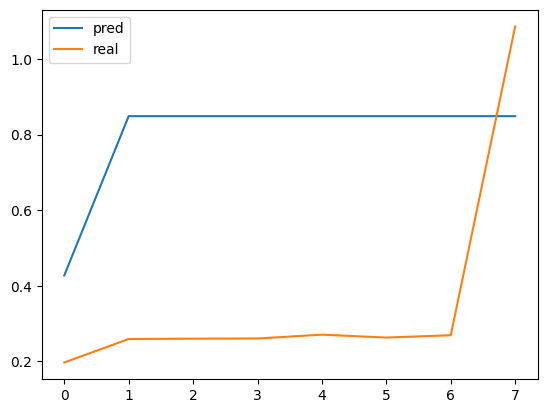

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scale, Y_train)
y_pred = lr.predict(X_test_scale)

print(f'R2 Score : {round(r2_score(Y_test, y_pred)*100, 2)}')

plt.plot(y_pred, label='pred')
plt.plot(Y_test.reset_index(drop=True), label='real')
plt.legend()

plt.show()

### SVM

In [ ]:
import sklearn.svm as svm
from sklearn.model_selection import GridSearchCV

# GridSearchCV
svr = svm.SVR()
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C' : [1, 10, 100],
    'gamma' : [0.01, 0.05, 0.1],
    'epsilon' : [0, 0.01, 0.1, 0.5, 1]
}

grid_svr = GridSearchCV(svr, parameters, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train_scale, Y_train_scale)

print(grid_svr.best_params_)

pd.DataFrame(grid_svr.cv_results_)[['rank_test_score', 'mean_test_score','params']].sort_values(by='rank_test_score')

{'C': 1, 'epsilon': 0, 'gamma': 0.05, 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,rank_test_score,mean_test_score,params
4,1,-0.880184,"{'C': 1, 'epsilon': 0, 'gamma': 0.05, 'kernel'..."
98,2,-0.880211,"{'C': 100, 'epsilon': 0, 'gamma': 0.1, 'kernel..."
94,3,-0.929901,"{'C': 100, 'epsilon': 0, 'gamma': 0.05, 'kerne..."
49,4,-0.929901,"{'C': 10, 'epsilon': 0, 'gamma': 0.05, 'kernel..."
91,5,-0.929903,"{'C': 100, 'epsilon': 0, 'gamma': 0.01, 'kerne..."
...,...,...,...
27,82,-14284.292518,"{'C': 1, 'epsilon': 0.5, 'gamma': 0.01, 'kerne..."
36,82,-14284.292518,"{'C': 1, 'epsilon': 1, 'gamma': 0.01, 'kernel'..."
37,82,-14284.292518,"{'C': 1, 'epsilon': 1, 'gamma': 0.01, 'kernel'..."
73,82,-14284.292518,"{'C': 10, 'epsilon': 0.5, 'gamma': 0.01, 'kern..."


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Score : 3.99


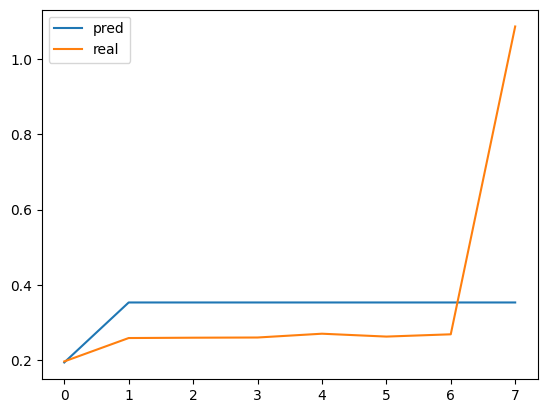

In [ ]:
svr = svm.SVR(kernel='rbf', C=1, gamma=0.05, epsilon=0)

svr.fit(X_train_scale, Y_train_scale)
y_pred = svr.predict(X_test_scale)

print(f'R2 Score : {round(r2_score(Y_test_scale, y_pred)*100, 2)}')

plt.plot(y_pred, label='pred')
plt.plot(Y_test_scale, label='real')
plt.legend()

plt.show()